# Decision Tree

In [118]:
import pandas as pd
from sklearn import tree 
from sklearn.model_selection import train_test_split

from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline



In [119]:
columns = ['price','maintenance_cost','doors','persons','lug_boot','safety','decision']

df = pd.read_csv('car_evaluation.csv', names = columns)
df.head()

,price,maintenance_cost,doors,persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [120]:
df.info() # No Missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             1728 non-null   object
 1   maintenance_cost  1728 non-null   object
 2   doors             1728 non-null   object
 3   persons           1728 non-null   object
 4   lug_boot          1728 non-null   object
 5   safety            1728 non-null   object
 6   decision          1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


## Exploratory data analysis

## Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.



In [121]:
#We can see that all the variables are ordinal categorical data type.

X_train.dtypes

price               int64
maintenance_cost    int64
doors               int64
persons             int64
lug_boot            int64
safety              int64
dtype: object

In [122]:
from sklearn.preprocessing import LabelEncoder
#label encoder can't handle missing values
#ordinal_features['ord_1'] = ordinal_features['ord_1'].fillna('None')
# Label encode ord_1 feature
label_encoder = LabelEncoder()

ord_features = ['price','maintenance_cost','doors','persons','lug_boot', 'safety','decision']
for i in range (len(ord_features)):
    df[ord_features[i]] = label_encoder.fit_transform(df[ord_features[i]])

    # Print sample of dataset
df.head()

,price,maintenance_cost,doors,persons,lug_boot,safety,decision
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


## Split data into separate training and test set 


In [123]:
# Declare feature vector and target variable

X = df.iloc[:, :6]
y = df.iloc[: , -1:]


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state =42, stratify = y)

print("X train", X_train.shape)
print("y train", y_train.shape)
print("X test", X_test.shape)
print("y test", y_test.shape)

X train (1209, 6)
y train (1209, 1)
X test (519, 6)
y test (519, 1)


## Decision Tree Classifier

In [127]:
dt = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [128]:
score = dt.score(X_test, y_test)
print("Model accuracy score:", score)


Model accuracy score: 0.7822736030828517


## Compare the train-set and test-set accuracy 
also check for overfitting and underfitting


In [129]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

Training set score: 0.7792
Test set score: 0.7823


These two values are quite comparable. So, there is no sign of overfitting.

## Visualize decision-tree

In [137]:

plt.figure(figsize=(15,7.5))
plot_tree(dt, label='all', filled=True)


NameError: name 'plot_tree' is not defined

<Figure size 1080x540 with 0 Axes>

## Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.



In [99]:

Prediction = dt.predict(X_test)
cm = metrics.confusion_matrix(y_test, Prediction)
print (cm)

[[100   0  15   0]
 [ 21   0   0   0]
 [ 57   0 306   0]
 [ 20   0   0   0]]


Text(0.5, 1.0, 'Accuracy score: 0.7822736030828517')

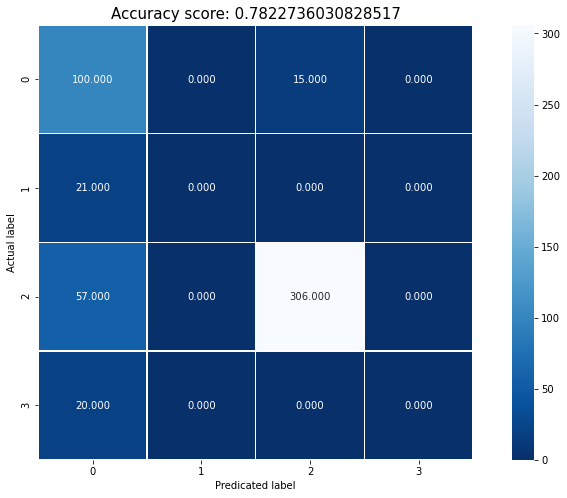

In [108]:

plt.figure(figsize=(14,8))

sns.heatmap(cm, annot =True, fmt = ".3f", linewidths = 0.5, square = True ,cmap = 'Blues_r')

plt.xlabel("Predicated label")
plt.ylabel("Actual label")
title = 'Accuracy score: {0}'.format(score)
plt.title(title, size = 15)